In [143]:
import pandas as pd
import numpy as np

In [144]:
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../년도별 주식데이터/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../년도별 주식데이터/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../년도별 주식데이터/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../년도별 주식데이터/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../년도별 주식데이터/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../년도별 주식데이터/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../년도별 주식데이터/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../년도별 주식데이터/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../년도별 주식데이터/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../년도별 주식데이터/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../년도별 주식데이터/코스닥주가.csv", encoding='cp949') 

In [145]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [146]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [147]:
# 투자 조건에 맞는 기업들을 오름차순 정렬
data_logit=data_logit[(data_logit["[제조]총자본사업이익률"]>=data_logit["[제조]총자본사업이익률"].quantile(.75)) & (data_logit["[제조]1주당매출액"]>=data_logit["[제조]1주당매출액"].quantile(.75))]
data_logit =data_logit.sort_values("[제조]총자본사업이익률", ascending=False)
data_logit

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
5294,(주)제놀루션,225220,2020-04-01,20200724,NaN,의료용 물질 및 의약품 제조업,5,523.86,111.26,21987.57,6.03,18.43,1.83,277.58,2562.56,10.41,31714.410000
2752,(주)씨젠,96530,2020-04-01,20100910,NaN,의료용 물질 및 의약품 제조업,5,459.27,104.94,42891.46,6.10,7.25,1.70,82.10,4919.69,10.72,496.010000
5339,(주)제이스텍,90470,2017-04-01,20070110,NaN,기타 기계 및 장비 제조업,5,23.51,61.23,39103.17,9.35,16.13,3.25,109.19,1768.21,26.56,241.570000
5723,(주)컴투스,78340,2014-04-01,20070706,NaN,출판업,5,111.11,56.14,23266.95,3.61,10.15,1.68,37.69,4175.33,13.27,2830.670000
406,(주)넥스틴,348210,2020-04-01,20201008,NaN,기타 기계 및 장비 제조업,5,193.83,49.88,18556.65,7.79,13.30,1.19,194.60,2904.47,21.82,41.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,(주)국보디자인,66620,2016-04-01,20020905,NaN,전문직별 공사업,5,12.31,8.05,26854.67,6.35,114.63,1.13,18.84,2318.10,78.36,6455.770000
3092,(주)안랩,53800,2016-04-01,20010913,NaN,출판업,5,10.27,8.04,14268.19,1.85,7.71,0.87,69.85,3319.15,73.17,3609.853333
8266,매일홀딩스(주),5990,2018-04-01,19990514,NaN,전문 서비스업,5,-4.30,8.03,108670.23,3.49,8.62,2.08,31.70,3975.85,60.15,16.710000
8498,삼지전자(주),37460,2015-04-01,19991216,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,266.31,8.02,59879.55,5.99,8.30,2.39,3.83,1432.80,27.38,4.990000


In [148]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


<ipython-input-148-3ce73cae502e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2012["투자일자"] = "2012-04-02"
<ipython-input-148-3ce73cae502e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2017["투자일자"] = "2017-04-03"
<ipython-input-148-3ce73cae502e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [149]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [150]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [151]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [152]:
data_logit_2011

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
5295,(주)제닉,123330,2011-04-01,20110803,NaN,화학물질 및 화학제품 제조업; 의약품 제외,5,98.05,31.08,21632.71,5.50,15.22,2.84,45.34,1907.32,30.79,87.760000
8964,에스맥(주),97780,2011-04-01,20080123,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,45.40,28.79,54116.78,13.95,10.63,2.76,30.31,2030.23,23.91,43.770000
6554,(주)티브로드한빛방송,43890,2011-04-01,20000810,2012-11-01,방송업,4,23.80,27.77,25115.18,1.73,12.93,1.83,26.66,394.53,2.98,85.760000
4269,(주)와이지엔터테인먼트,122870,2011-04-01,20111123,NaN,영상ㆍ오디오 기록물 제작 및 배급업,5,142.32,27.63,15667.49,5.71,12.19,1.20,266.69,2879.00,24.65,21.051429
6305,(주)크레버스,96240,2011-04-01,20080627,NaN,교육 서비스업,5,0.22,25.85,16632.82,2.69,9.65,1.87,148.88,2052.58,0.00,39.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7399,(주)현대에버다임,41440,2011-04-01,20031114,NaN,기타 기계 및 장비 제조업,5,13.41,8.72,13868.81,3.45,4.52,0.90,5.74,1292.60,50.77,5.080000
8414,삼강엠앤티(주),100090,2011-04-01,20080101,NaN,1차 금속 제조업,5,9.96,8.53,30108.12,1.13,8.07,1.36,1.93,1114.80,30.31,1.930000
1956,(주)상보,27580,2011-04-01,20071001,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,17.66,8.37,15642.20,2.19,6.84,1.12,21.39,704.76,39.02,3.650000
2165,(주)성우하이텍,15750,2011-04-01,19951104,NaN,자동차 및 트레일러 제조업,5,12.63,8.14,51677.78,2.53,5.70,1.23,18.13,2602.61,39.77,4.730000


In [153]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [154]:
stock_2011

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
0,53134,(주)CMG제약,58820,2011-04-01,1710,-0.001168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54907,(주)CMG제약,58820,2011-04-04,1708,-0.001170,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55794,(주)CMG제약,58820,2011-04-05,1732,0.014052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56489,(주)CMG제약,58820,2011-04-06,1732,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57415,(주)CMG제약,58820,2011-04-07,1735,0.001732,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232119,280536,흥구석유(주),24060,2012-03-26,1745,0.002874,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232120,281614,흥구석유(주),24060,2012-03-27,1720,-0.014327,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232121,282512,흥구석유(주),24060,2012-03-28,1720,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232122,284240,흥구석유(주),24060,2012-03-29,1735,0.008721,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [156]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [157]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [158]:
stock_2011[stock_2011["trade"]=="sell"]

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
4215,284960,(주)금화피에스시,36190,2012-03-30,14200,0.010676,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
5961,285107,(주)네오위즈,95660,2012-03-30,35100,0.023324,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
6211,285171,(주)네오위즈홀딩스,42420,2012-03-30,18500,0.019284,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
42820,284335,(주)서산,79650,2012-03-30,589,0.027923,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
44762,284402,(주)선광,3100,2012-03-30,21250,0.029056,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
70722,284684,(주)에스에프에이,56190,2012-03-30,26750,0.028846,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
75321,285169,(주)에이스침대,3800,2012-03-30,15880,0.007614,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
81917,285154,(주)엔텔스,69410,2012-03-30,3945,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
93525,284500,(주)원익큐엔씨,74600,2012-03-30,3990,0.019417,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
102828,284601,(주)이노와이어리스,73490,2012-03-30,28100,0.008977,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell


In [159]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [160]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [161]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,0.368248,1.003682
1,2011-04-05,0.057967,1.000580
2,2011-04-06,-0.298430,0.997016
3,2011-04-07,1.505519,1.015055
4,2011-04-08,0.718176,1.007182
...,...,...,...
2448,2021-03-25,-0.659074,0.993409
2449,2021-03-26,0.537565,1.005376
2450,2021-03-29,-0.593196,0.994068
2451,2021-03-30,-0.300879,0.996991


In [162]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [163]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [164]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [165]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [166]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [167]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [168]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [169]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [170]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,0.368248,1.003682,1.003682,1.003682,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,0.057967,1.000580,1.004264,1.004264,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,-0.298430,0.997016,1.001267,1.001267,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,1.505519,1.015055,1.016342,1.016342,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,0.718176,1.007182,1.023641,1.023641,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.659074,0.993409,19.189880,2.099614,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,0.537565,1.005376,19.293038,2.110901,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,-0.593196,0.994068,19.178592,2.098379,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,-0.300879,0.996991,19.120888,2.092066,10.0,958.06,388660278311558,0.415051,0.004349


In [171]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,0.368248,1.003682,1.003682,1.003682,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,0.057967,1.000580,1.004264,1.004264,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,-0.298430,0.997016,1.001267,1.001267,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,1.505519,1.015055,1.016342,1.016342,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,0.718176,1.007182,1.023641,1.023641,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.659074,0.993409,19.189880,2.099614,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,0.537565,1.005376,19.293038,2.110901,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,-0.593196,0.994068,19.178592,2.098379,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,-0.300879,0.996991,19.120888,2.092066,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [172]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,0.368248,1.003682,1.003682,1.003682,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,0.057967,1.000580,1.004264,1.004264,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,-0.298430,0.997016,1.001267,1.001267,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,1.505519,1.015055,1.016342,1.016342,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,0.718176,1.007182,1.023641,1.023641,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.659074,0.993409,19.189880,2.099614,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,0.537565,1.005376,19.293038,2.110901,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,-0.593196,0.994068,19.178592,2.098379,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,-0.300879,0.996991,19.120888,2.092066,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [173]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [174]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [175]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
0,2011-04-04,0.368248,1.003682,1.003682,1.003682,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338,1.005338
1,2011-04-05,0.057967,1.000580,1.004264,1.004264,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525,1.010525
2,2011-04-06,-0.298430,0.997016,1.001267,1.001267,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609,1.003609
3,2011-04-07,1.505519,1.015055,1.016342,1.016342,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469,1.005469
4,2011-04-08,0.718176,1.007182,1.023641,1.023641,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.659074,0.993409,19.189880,2.099614,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700,1.730556
2449,2021-03-26,0.537565,1.005376,19.293038,2.110901,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883,1.733655
2450,2021-03-29,-0.593196,0.994068,19.178592,2.098379,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043,1.728943
2451,2021-03-30,-0.300879,0.996991,19.120888,2.092066,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415,1.736119


In [176]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [177]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [178]:
stock_rtn_all.to_csv('./dataset/수익성범주.csv', encoding='CP949',index=False)

In [179]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,0.368248,0.368248,0.368248,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,0.057967,0.426429,0.426429,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,-0.298430,0.126726,0.126726,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,1.505519,1.634153,1.634153,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,0.718176,2.364065,2.364065,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-0.659074,1818.987985,109.961416,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,0.537565,1829.303793,111.090095,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,-0.593196,1817.859244,109.837918,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,-0.300879,1812.088818,109.206561,958.06,0.415051,78.341459,73.611916,10.0


In [180]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.07


In [181]:
Sharpe *np.sqrt(252)

1.072334802328205

In [182]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.9532567342653548

In [183]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)


0        -9.507189
1        -8.169982
2       -18.663294
3         5.033847
4         8.984803
           ...    
2448    111.827813
2449    111.947639
2450    111.814665
2451    111.747333
2452    111.778933
Name: 누적수익률(%), Length: 2453, dtype: float64


In [184]:
Std

1.4507698495344745

In [185]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [186]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [187]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.368248,0.368248,0.368248,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.057967,0.426429,0.426429,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-0.298430,0.126726,0.126726,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,1.505519,1.634153,1.634153,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.718176,2.364065,2.364065,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-0.123342,23.011612,23.011612,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.172487,22.799432,22.799432,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-1.367889,21.119673,21.119673,519.56,-0.417833,-2.349359,-2.349359,1.0


In [188]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.26012286631541726
1.683814324384404
Sharpe ratio: 0.05
0.7993166693545963


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.368248,0.368248,0.368248,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.057967,0.426429,0.426429,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-0.298430,0.126726,0.126726,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,1.505519,1.634153,1.634153,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.718176,2.364065,2.364065,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-0.123342,23.011612,23.011612,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.172487,22.799432,22.799432,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-1.367889,21.119673,21.119673,519.56,-0.417833,-2.349359,-2.349359,1.0


In [189]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.3998949074154086
1.3324842734842572
Sharpe ratio: 0.10
1.6304493330355991


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-1.312779,19.344411,-1.312779,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-2.634595,16.200170,-3.912787,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,0.780296,17.106875,-3.163022,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,0.535762,17.734289,-2.644207,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-3.411460,13.717831,-5.965461,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,0.675063,79.537198,48.461306,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,0.130917,79.772242,48.655667,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,-0.400833,79.051655,48.059806,548.72,-0.214584,2.688501,5.159065,2.0


In [190]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013


-0.21648116849034707
1.3811719912101774
Sharpe ratio: 0.04
0.6229383774870091


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,0.652194,79.769941,0.652194,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,1.193939,81.916284,1.853919,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,0.059033,82.023675,1.914047,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-0.741370,80.674207,1.158487,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-3.662203,74.057551,-2.546142,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-1.762199,96.527850,10.034854,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,0.925467,98.346651,11.053190,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.599086,97.158383,10.387886,541.46,-0.490692,1.521912,-2.258245,3.0


In [191]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014

-0.4069867095420293
0.8450732804863201
Sharpe ratio: 0.18
2.846751225360984


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,2.129678,101.714416,2.129678,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,0.630858,102.986948,2.773971,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,0.902968,104.819855,3.701988,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,-1.309586,102.137563,2.343921,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-0.358775,101.412343,1.976736,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,0.214083,239.248866,71.764508,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,-0.763414,236.658991,70.453233,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-1.057872,233.097571,68.650057,640.12,-0.375080,18.380944,16.580462,4.0


In [192]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015


-0.24964225533943954
1.36008510872229
Sharpe ratio: 0.05
0.75537880072771


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,0.424876,239.373418,0.424876,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,0.458682,240.930062,0.885507,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,1.024238,244.421998,1.918815,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,0.454897,245.988764,2.382441,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,0.851745,248.935708,3.254478,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,-0.644453,322.143949,24.917721,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,-1.073350,317.612867,23.576916,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,0.127965,318.147266,23.735052,686.50,1.476697,27.009020,5.578026,5.0


In [193]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016


-0.20225440944931675
0.9865453038996267
Sharpe ratio: 0.12
1.930160100967119


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,1.579300,327.433465,1.579300,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,1.938307,335.718439,3.548219,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,0.103913,336.171209,3.655819,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,0.859856,339.921652,4.547110,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,0.661153,342.830209,5.238326,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,-0.411255,398.098981,18.372916,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,1.191384,404.033253,19.783192,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,0.405372,406.076464,20.268760,613.63,0.220487,13.147688,-11.156959,6.0


In [194]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017


-0.37846397795504444
1.4606994790381
Sharpe ratio: 0.04
0.5679281358472281


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,0.639301,409.952860,0.639301,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,0.873753,414.408589,1.518640,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,0.038188,414.605033,1.557409,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,0.115147,415.197583,1.674348,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-2.448934,402.580735,-0.815589,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,2.797012,685.179177,54.955271,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,0.820294,691.619954,56.226360,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-0.851525,684.879114,54.896054,850.97,-0.916352,54.604205,35.392668,7.0


In [195]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018

-0.28757125095418934
1.5791322163977977
Sharpe ratio: 0.06
0.9767244961803713


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2018-04-03,-0.287224,688.421722,-0.287224,872.32,0.520857,59.083913,0.520857,8.0
2018-04-04,-1.353356,677.751570,-1.636693,862.51,-1.124587,57.294876,-0.609587,8.0
2018-04-05,2.044120,693.649748,0.373971,868.93,0.744339,58.465683,0.130214,8.0
2018-04-06,-0.445057,690.117554,-0.072750,867.96,-0.111632,58.288785,0.018437,8.0
2018-04-09,0.334331,692.759161,0.261338,874.44,0.746578,59.470535,0.765153,8.0
...,...,...,...,...,...,...,...,...
2019-03-25,-2.558289,728.730374,4.810666,727.21,-2.252779,32.620383,-16.200737,8.0
2019-03-26,1.795003,743.606110,6.692021,736.81,1.320114,34.371123,-15.094492,8.0
2019-03-27,-1.013361,735.057335,5.610846,728.45,-1.134621,32.846520,-16.057847,8.0


In [196]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019


-0.35419192018786033
2.106493574625657
Sharpe ratio: 0.07
1.0707189155027956


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,-0.084110,734.198296,-0.084110,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,1.264660,744.748071,1.179487,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,-0.744582,738.458230,0.426122,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,0.558246,743.138887,0.986747,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,-0.449909,739.345533,0.532399,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,4.734592,765.567075,3.673077,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,-1.111826,755.943471,2.520413,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,1.009162,764.581324,3.555010,522.83,1.204003,-5.622691,-29.041408,9.0


In [197]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020

-0.5202326942864572
1.3782686544534055
Sharpe ratio: 0.06
0.8743521816402836


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,3.705802,847.841707,3.705802,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,1.557027,862.599854,5.320528,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,3.867080,899.824358,9.393357,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,0.704571,906.868831,10.164111,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,0.787292,914.795828,11.031424,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,-0.659074,1818.987985,109.961416,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,0.537565,1829.303793,111.090095,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,-0.593196,1817.859244,109.837918,954.10,-0.271768,77.604311,72.894317,10.0


In [198]:
stcok_rtn_2019=stock_rtn_all[stock_rtn_all["투자연차"]!=10]
stcok_rtn_2019

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.368248,0.368248,0.368248,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.057967,0.426429,0.426429,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,-0.298430,0.126726,0.126726,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,1.505519,1.634153,1.634153,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.718176,2.364065,2.364065,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2020-03-25,4.734592,765.567075,3.673077,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,-1.111826,755.943471,2.520413,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,1.009162,764.581324,3.555010,522.83,1.204003,-5.622691,-29.041408,9.0


In [199]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stcok_rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stcok_rtn_2019["일일수익률(%)"] - stcok_rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+stcok_rtn_2019["누적수익률(%)"].min())-(100+stcok_rtn_2019["누적수익률(%)"].max()))/(stcok_rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
cagr = (stcok_rtn_2019
        ["누적수익률(%)"]**(1/9))-1
print(cagr*100)


-0.9175895813075124
1.4575081063707718
Sharpe ratio: 0.07
1.0940698752565856
투자일자
2011-04-04    -10.506103
2011-04-05     -9.035517
2011-04-06    -20.508915
2011-04-07      5.608577
2011-04-08     10.031672
                 ...    
2020-03-25    109.142639
2020-03-26    108.848878
2020-03-27    109.112700
2020-03-30    109.926901
2020-03-31    110.572201
Name: 누적수익률(%), Length: 2208, dtype: float64


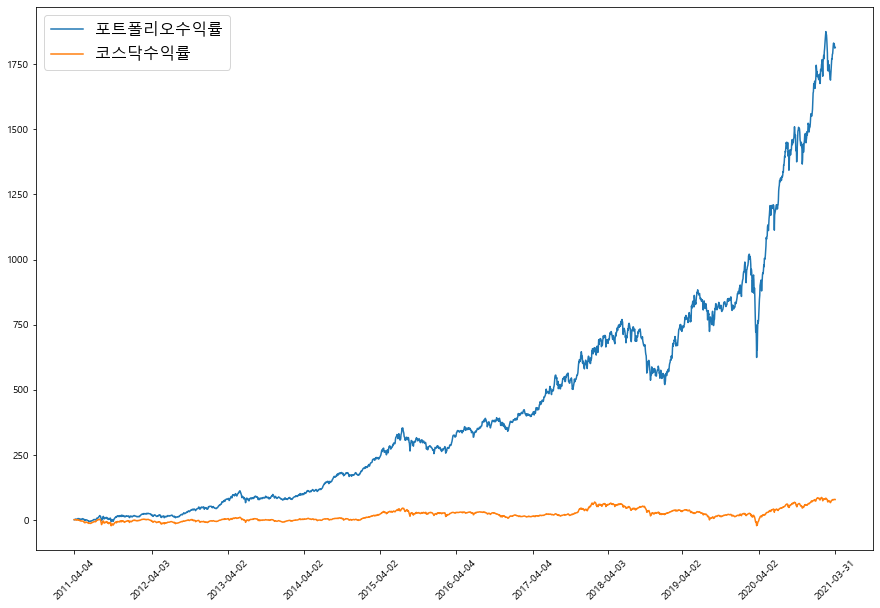

In [200]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,249,495,741,984,1231,1478,1719,1960,2208,2452], rotation=45)

plt.show()

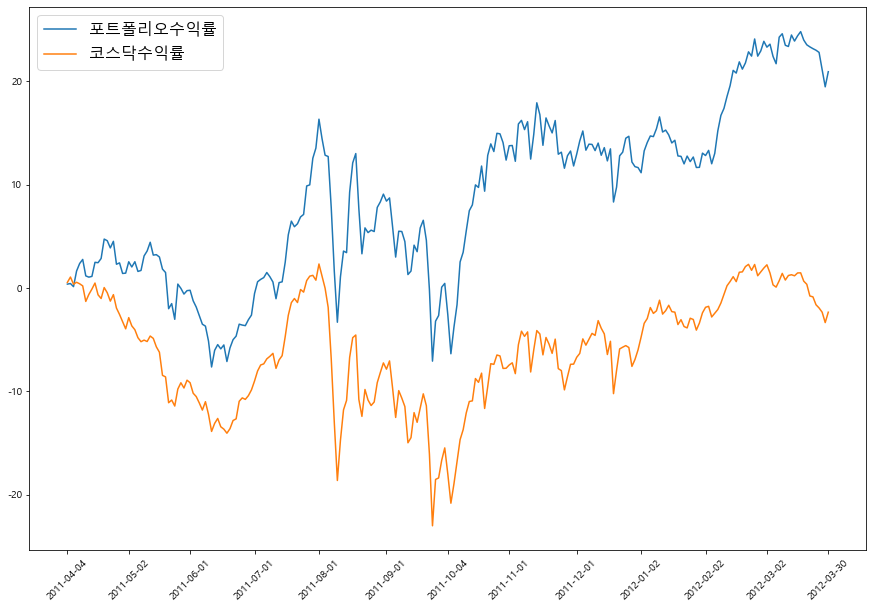

In [201]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2011["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2011["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

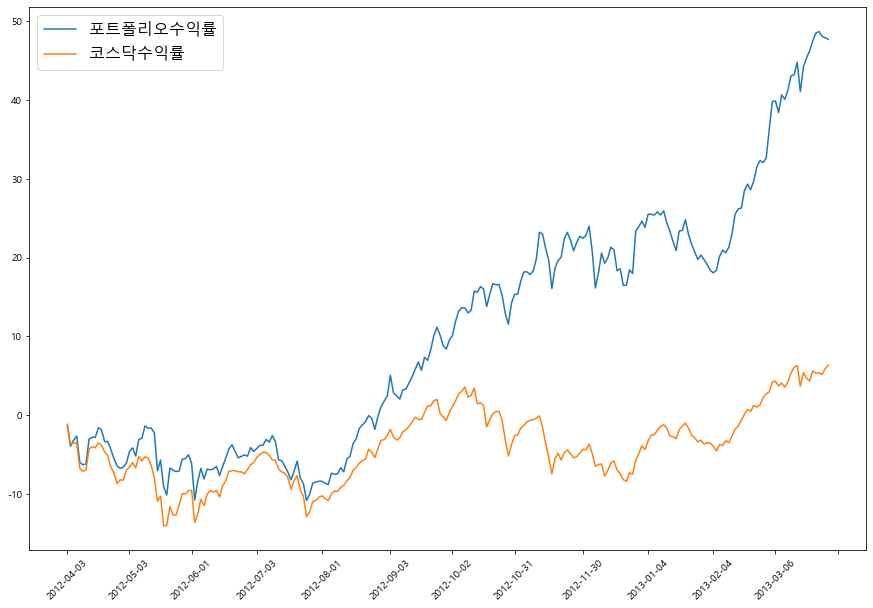

In [202]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2012["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2012["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

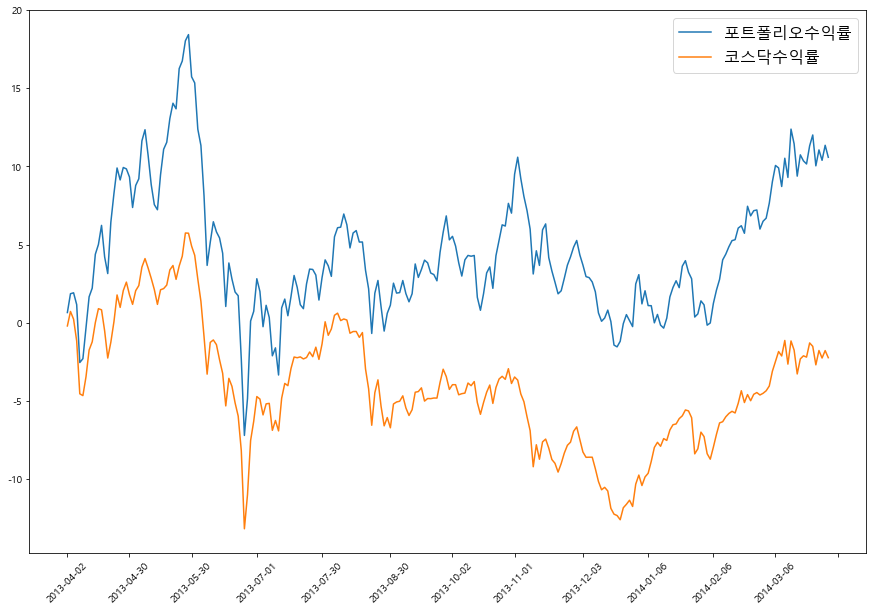

In [203]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2013["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2013["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

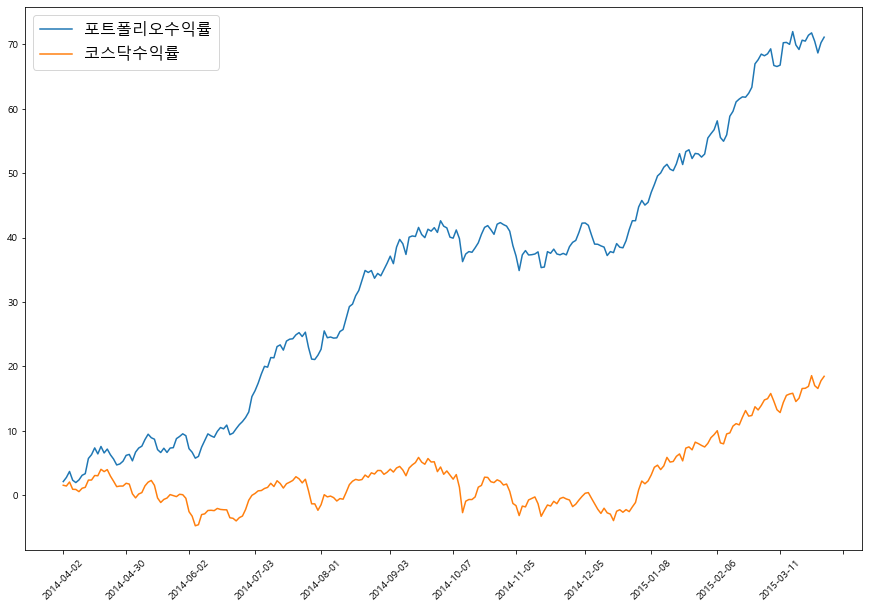

In [204]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2014["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2014["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

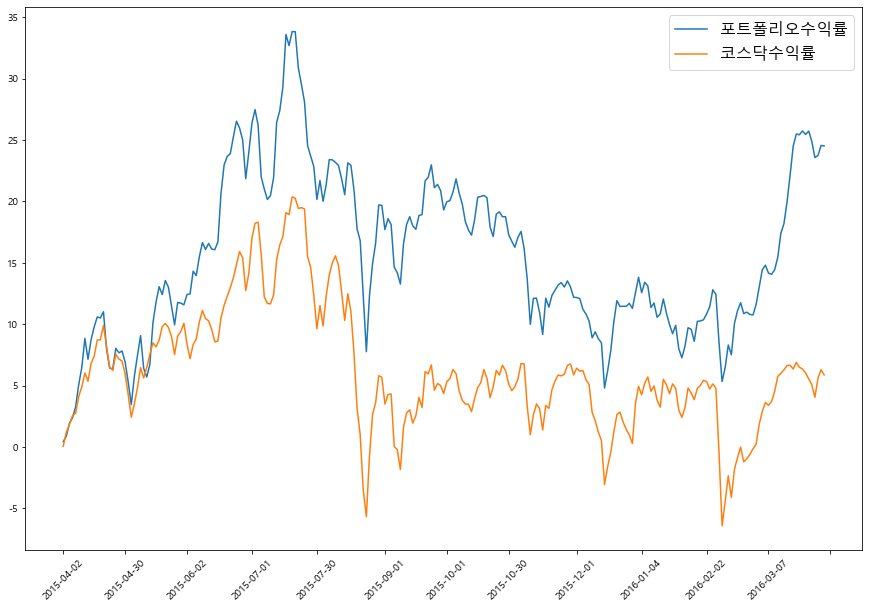

In [205]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2015["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2015["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

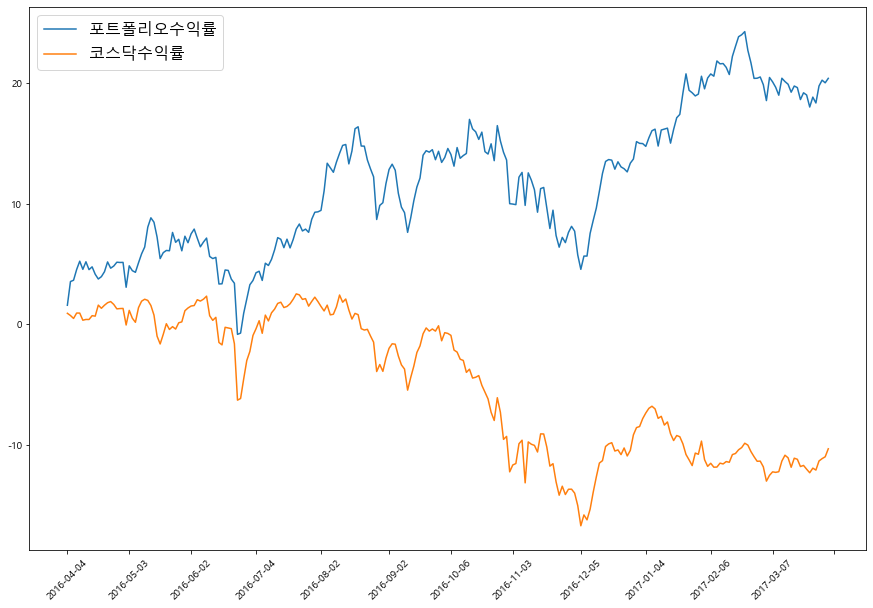

In [206]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2016["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2016["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

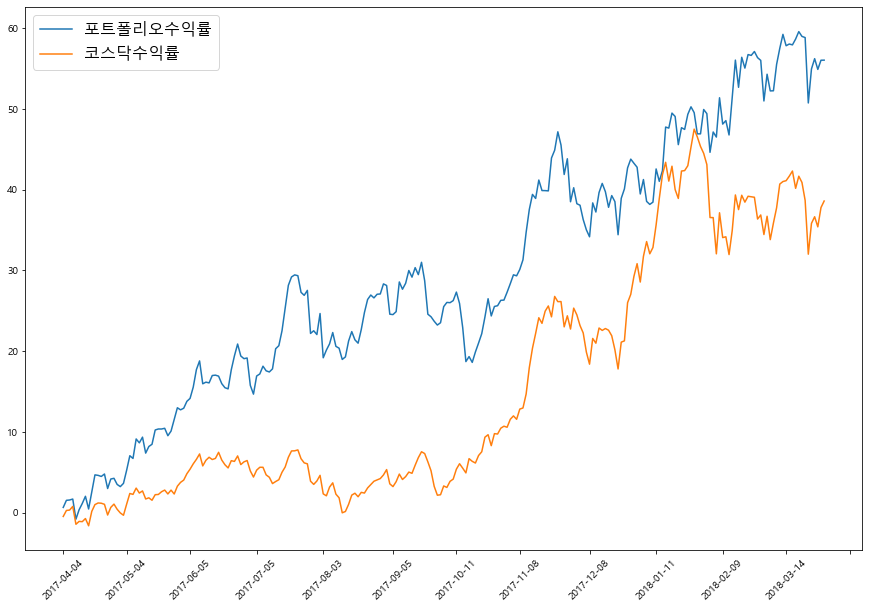

In [207]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2017["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2017["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

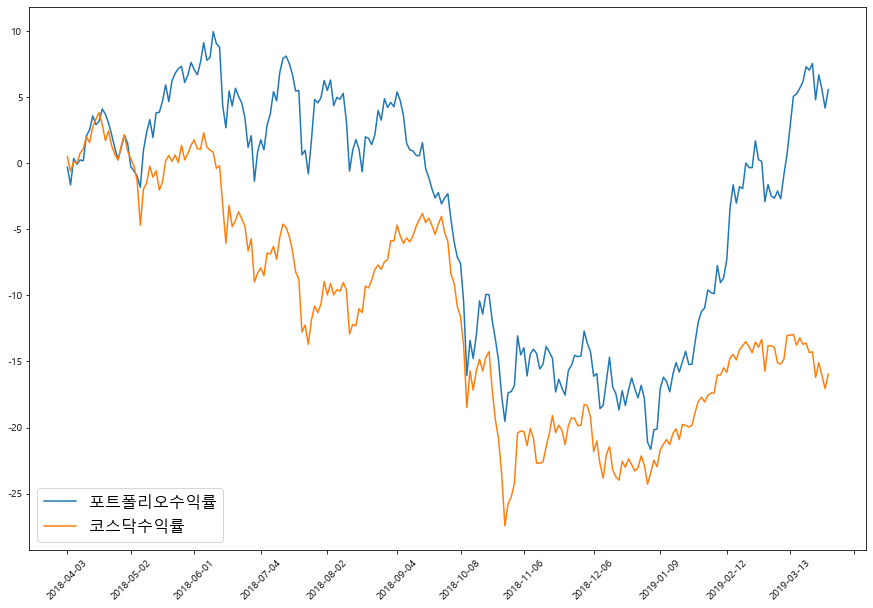

In [208]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2018["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2018["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

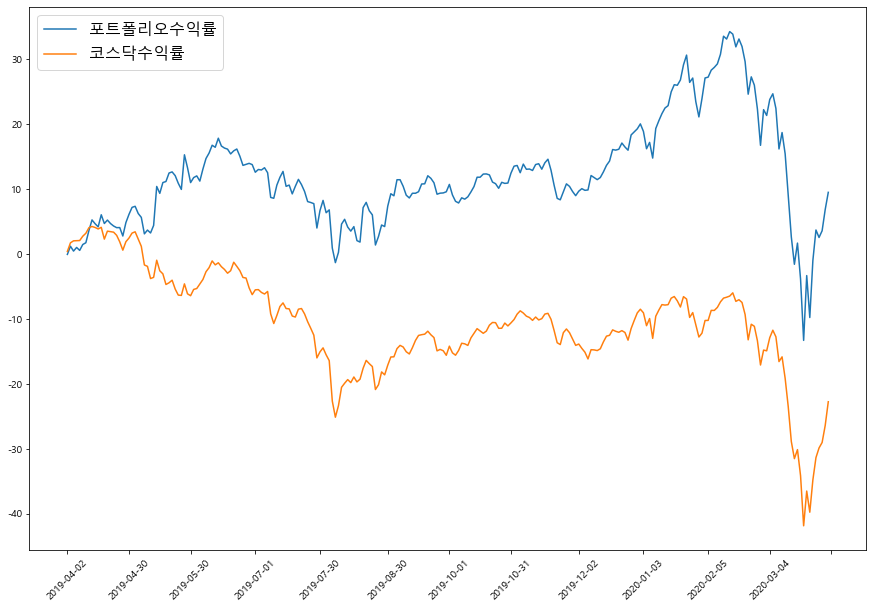

In [209]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2019["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2019["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

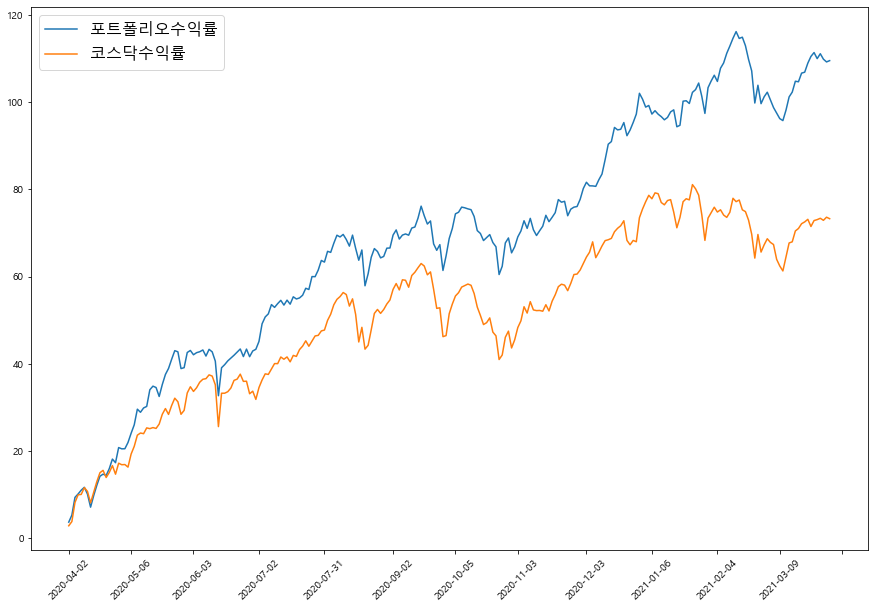

In [210]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2020["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2020["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()